In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [130]:
df = pd.read_csv("F:/data science/Social_Network_Ads1.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [131]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [132]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [133]:
df.shape


(400, 5)

In [134]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [135]:
df = df.drop('User ID', axis = 1)


In [136]:
df.duplicated().sum()


20

In [137]:
df.drop_duplicates(inplace=True)


In [138]:
df.duplicated().sum()


0

In [139]:
df.head(5)


,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [140]:
df['Gender'].replace({'Male':0,'Female':1},inplace=True)

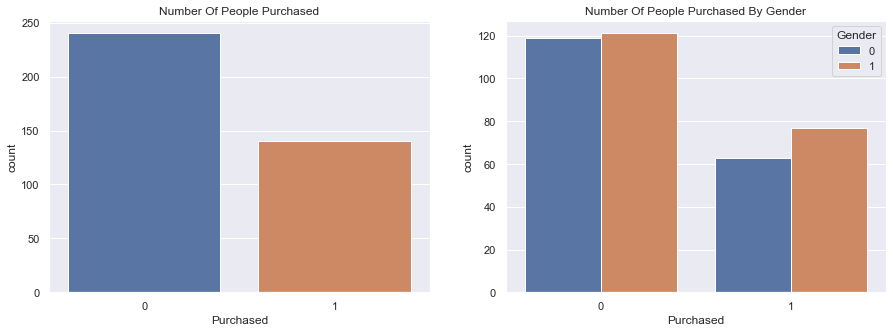

In [141]:
fig ,axes = plt.subplots(1,2, figsize=(15,5))
sns.countplot(ax=axes[0],x='Purchased',data=df)
axes[0].set_title('Number Of People Purchased')
sns.countplot(ax=axes[1],x='Purchased',hue='Gender',data=df)
axes[1].set_title('Number Of People Purchased By Gender')
plt.show()

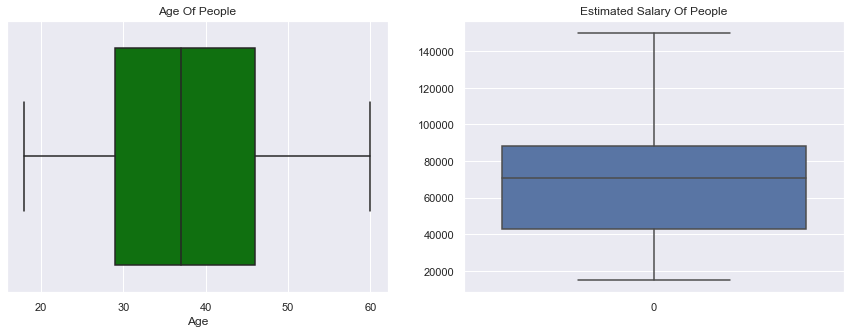

In [142]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(ax=axes[0],x= df['Age'], color = "green")
axes[0].set_title('Age Of People')


sns.boxplot(ax=axes[1],data = df['EstimatedSalary'])
axes[1].set_title('Estimated Salary Of People')

plt.show()

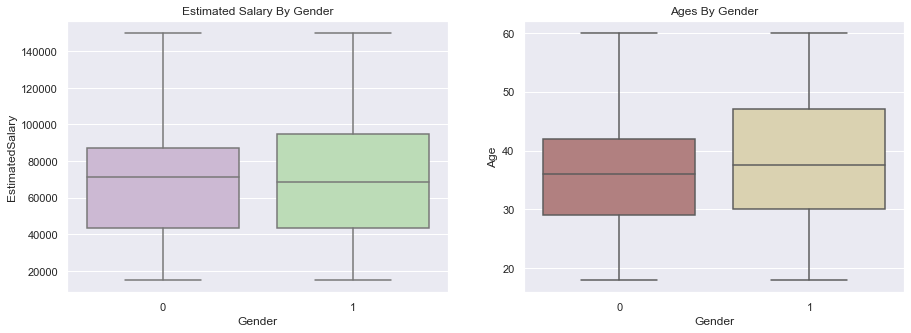

In [143]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(ax=axes[0],x=df['Gender'], y=df['EstimatedSalary'], palette="PRGn")
axes[0].set_title('Estimated Salary By Gender')

sns.boxplot(ax=axes[1],x=df['Gender'], y=df['Age'], palette="pink")
axes[1].set_title('Ages By Gender')
plt.show()

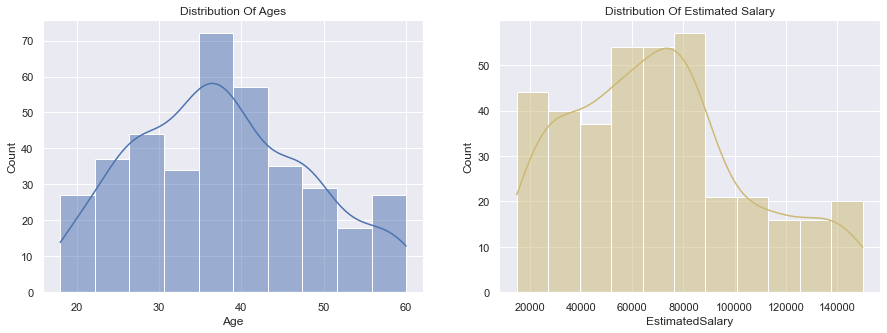

In [144]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
sns.histplot(ax=axes[0],x='Age',data=df,kde=True)
axes[0].set_title('Distribution Of Ages')
sns.histplot(ax=axes[1],x='EstimatedSalary',data=df,color="y",kde=True)
axes[1].set_title('Distribution Of Estimated Salary')
plt.show()

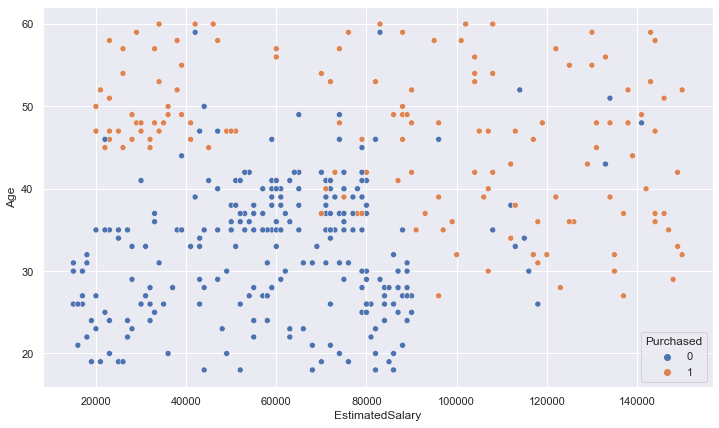

In [145]:
fig, ax = plt.subplots(figsize = (12, 7))
sns.scatterplot(ax=ax,data=df,x="EstimatedSalary",y="Age",hue="Purchased")
plt.show()

<AxesSubplot:>

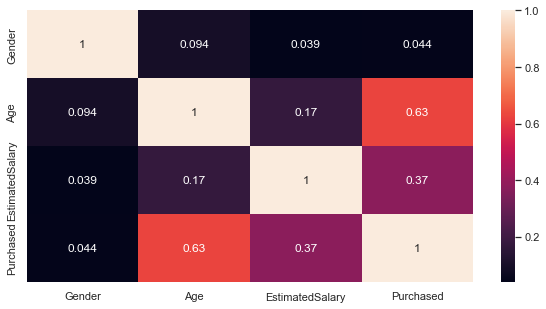

In [146]:
plt.figure(figsize =(10,5))
sns.heatmap(df.corr(),annot=True)

In [147]:
# set inputs and outputs
X = df.drop('Purchased',axis = 1)     
y = df['Purchased']

In [148]:
# Split the data into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [149]:
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [150]:
# checking the shape of the train and test datasets
print("The shape of x_train is: ",x_train.shape)
print("The shape of x_test is: ",x_test.shape)
print("The shape of y_train is: ",y_train.shape)
print("The shape of y_test is: ",y_test.shape)

The shape of x_train is:  (266, 3)
The shape of x_test is:  (114, 3)
The shape of y_train is:  (266,)
The shape of y_test is:  (114,)


In [151]:
# Train the logistic regression model
model = LogisticRegression()
model.fit(x_train,y_train)
# Predict on the test set
y_pred = model.predict(x_test)

In [152]:
#Evaluate the model
print(f'Test accuracy: {model.score(x_test,y_test)*100}')
print(f'Train accuracy: {model.score(x_train,y_train)*100}')

Test accuracy: 81.57894736842105
Train accuracy: 81.95488721804512


In [153]:
#Create a classification report for the model.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86        69
           1       0.85      0.64      0.73        45

    accuracy                           0.82       114
   macro avg       0.83      0.79      0.80       114
weighted avg       0.82      0.82      0.81       114



In [154]:
print("Accuracy:", accuracy_score(y_test,y_pred))
print("Precision:", precision_score(y_test, y_pred, ))
print("Recall:", recall_score(y_test,y_pred))
print("F1 Score:", f1_score(y_test,y_pred))

Accuracy: 0.8157894736842105
Precision: 0.8529411764705882
Recall: 0.6444444444444445
F1 Score: 0.7341772151898734
